In [45]:
import nltk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [46]:
pd.set_option("max_rows", None, "max_columns", None)
data = pd.read_csv("HarryPotterReview.txt", names=['Label', 'Reviews'], sep='\t')
data

,Label,Reviews
0,Satisfied,"As expected, the illustrations brought this bo..."
1,Satisfied,I'm going to keep this brief since there isn't...
2,Satisfied,My original review was a comparison of sorts b...
3,Satisfied,One of my first jobs was at a bookstore. When ...
4,Satisfied,I will never ever rate this lower than 5 stars...
5,Satisfied,There are no words to do this book justice.
6,Satisfied,(A-) 83% | Very Good Notes: Despite a weak cli...
7,Satisfied,Why the heck did I not read Harry Potter befor...
8,Satisfied,"Third Re-read of the series, and this time I r..."
9,Satisfied,"I read this book a couple of years ago and, fo..."


In [47]:
data['Label'].value_counts()

Dissatisfied    200
Satisfied       200
Name: Label, dtype: int64

In [48]:
data['body_len'] = data['Reviews'].apply(lambda x: len(x) - x.count(" "))

def clean_text(text):
    text = text.lower().split()
    text = [a for a in text if a.isalpha()]

    stop = set(stopwords.words('english'))
    text = [word for word in text if word not in stop]

    lemma = nltk.WordNetLemmatizer()
    text = [lemma.lemmatize(words) for words in text]

    return text

## Split Corpus into train/test set

In [49]:
x = data[['Reviews', 'body_len']]
y = data['Label']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.45, random_state=198)

In [50]:
#pd.set_option("max_rows", None, "max_columns", None)
#pd.set_option("display.max_colwidth", -1)
#df=pd.DataFrame(x_test)
#df.sort_index()

## Vectorize the text

In [51]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_vect_fit = tfidf_vect.fit(x_train['Reviews'])

tfidf_train = tfidf_vect_fit.transform(x_train['Reviews'])
tfidf_test = tfidf_vect_fit.transform(x_test['Reviews'])

x_train_vect = pd.concat(
    [x_train[['body_len']].reset_index(drop=True),
    pd.DataFrame(tfidf_train.toarray())],
    axis=1
)

x_test_vect = pd.concat(
    [x_test[['body_len']].reset_index(drop=True),
    pd.DataFrame(tfidf_test.toarray())],
    axis=1
)

x_train_vect.head()

body_len    0         1    2         3    4    5    6    7    8    9   10  \
0       414  0.0  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1      1527  0.0  0.080019  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2       135  0.0  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3      1056  0.0  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4      2386  0.0  0.000000  0.0  0.052836  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    11   12   13   14   15   16   17   18   19   20   21   22   23   24   25  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    26   27   28   29   30   31   32   33        34   35   36   37   38   39  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.327071  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0   

    40   41   42   43   44   45   46   47   48   49   50   51   52   53  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

         54   55   56   57        58   59   60   61   62   63   64   65   66  \
0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.108668  0.0  0.0  0.0  0.062147  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    67   68   69   70   71        72   73   74   75   76   77   78   79   80  \
0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.075352  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    81   82   83   84   85   86   87   88   89   90   91   92   93   94   95  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    96   97        98   99  100  101  102  103       104  105  106  107  108  \
0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.108668  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.392848  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0   

   109  110  111  112  113  114  115       116  117       118  119  120  121  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.

In [52]:
model = LinearSVC()
model.fit(x_train_vect, y_train)
y_pred = model.predict(x_test_vect)

acc = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(acc*100))

Accuracy: 53.33
C:\Users\Rene Baribal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


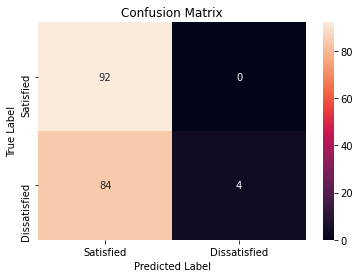

In [53]:
cm = confusion_matrix(y_test, y_pred)

class_label = ['Satisfied', 'Dissatisfied']
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)

sns.heatmap(df_cm, annot = True, fmt = 'd')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()